## Classificazione con K-Nearest Neighbors (KNN)

Per il modello KNN è stato necessario effettuare una standardizzazione delle feature, in quanto la distanza euclidea utilizzata è sensibile alla scala delle variabili. Il classificatore è stato addestrato con `k=5` (numero di vicini), ma il parametro può essere ottimizzato in seguito tramite Grid Search.

Dopo l'addestramento, sono state valutate le metriche di accuracy, F1-score macro, precision e recall su entrambi i dataset di training e test. Il confronto tra i risultati ha permesso di stimare la capacità di generalizzazione del modello e l'eventuale presenza di overfitting.

Infine, è stata stampata anche la confusion matrix e un report dettagliato delle metriche per ciascuna classe.


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import joblib
import sys
sys.path.append('../Scripts')
from utility import evaluate_and_save_model_multiclass


X_train = pd.read_csv("../data/splitted_category/X_train.csv")
X_test = pd.read_csv("../data/splitted_category/X_test.csv")
y_train = pd.read_csv("../data/splitted_category/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/splitted_category/y_test.csv").values.ravel()

# Standardizziamo tramite StandardScaler()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
k=5
knn = KNeighborsClassifier(n_neighbors=k)  
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_train = knn.predict(X_train_scaled)
y_pred_test = knn.predict(X_test_scaled)


evaluate_and_save_model_multiclass(
    knn,
    "knn",
    y_train,
    y_pred_train,
    y_test,
    y_pred_test,
    "../results/classification_category/knn",
    "../models/knn_category.joblib",
    {"k":5}
)


#  GridSearch su K
a tal fine andiamo a fare una ricerca per la migliore scelta del paramentro k

In [ ]:
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

param_grid = {
    "knn__n_neighbors": list(range(1, 21))  
}


grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

output_dir = "../results/classification_category/knn"
os.makedirs(output_dir, exist_ok=True)

with open(os.path.join(output_dir, "gridsearch_knn.txt"), "w") as f:
    f.write("=== Grid Search KNN ===\n\n")
    f.write("Miglior valore di k: {}\n".format(grid.best_params_["knn__n_neighbors"]))
    f.write("F1-score (macro) medio migliore: {:.4f}\n\n".format(grid.best_score_))
    f.write("Risultati completi:\n")
    
    means = grid.cv_results_["mean_test_score"]
    stds = grid.cv_results_["std_test_score"]
    params = grid.cv_results_["params"]
    
    for mean, std, param in zip(means, stds, params):
        f.write("k = {:<2} --> F1 = {:.4f} (+/- {:.4f})\n".format(
            param["knn__n_neighbors"], mean, std * 2))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


# Metodo del gomito
Questo metodo è usato al fine di stimare il punto ottimale k 

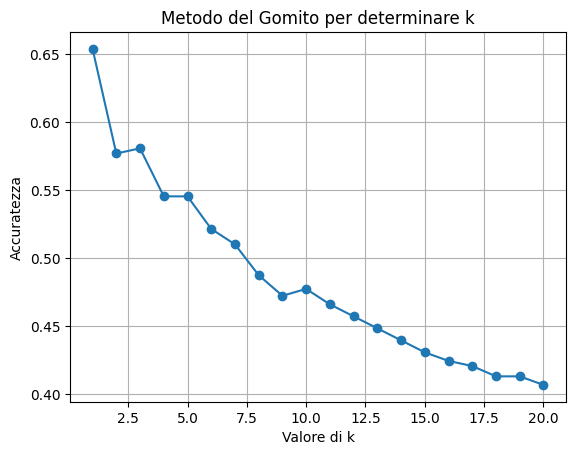

✔ Grafico salvato in: ../results/classification_category/knn/gomito_KNN_accuracy.png


In [ ]:


import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Valore di k')
plt.ylabel('Accuratezza')
plt.title('Metodo del Gomito per determinare k')
plt.grid(True)
output_path = "../results/classification_category/knn/gomito_KNN_accuracy.png"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path)
plt.show()
plt.close()

print(f"✔ Grafico salvato in: {output_path}")

Le tecniche applicate ci hanno suggerito un valore di k=1 che porta ad avere un miglioramento complessivo delle performance ma l'overfitting persiste. Di conseguenza per migliorare la capacità del modello KNN è stata rappresentata in 14b_KNN_category.ipynb una versione tramite Bagging